In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn

##### Training Data

In [2]:
bm=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
bm.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
bm.columns    

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
bm.shape       

(8523, 12)

In [5]:
bm.dtypes      

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
bm.isnull().sum()  

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

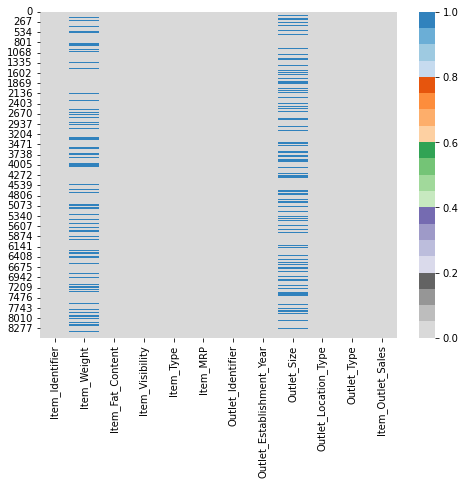

In [7]:
plt.figure(figsize=(8,6))  
sns.heatmap(bm.isnull(),cmap='tab20c_r')
plt.show()


##### Observation-1 :

In the above dataset-
    
    1) The size of table is 8523*12 i.e. no. of rows are 8523 and no. of columns are 12(including target).
    
    2) Out of 12 column, 7 columns are object type and rest 5 are int data types. So we will change object data type column into numeric data type using encoding technique.
    
    3) Huge amount of Null values are present in the item_weight and outlet_size columns, So there is need to adopt imputation technique.

### Adopting Imputation Technique 

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
si=SimpleImputer(strategy='most_frequent')

###### For training data

In [10]:
bm['Item_Weight']=si.fit_transform(bm['Item_Weight'].values.reshape(-1,1))
bm['Outlet_Size']=si.fit_transform(bm['Outlet_Size'].values.reshape(-1,1))

## EDA
###### (Exploratory Data Analysis)

##### For training data

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


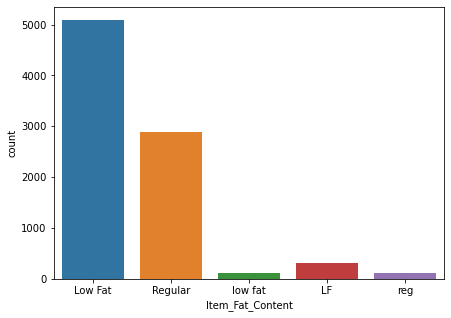

In [11]:
print(bm['Item_Fat_Content'].value_counts())
plt.figure(figsize=(7,5))
sns.countplot(bm['Item_Fat_Content'])
plt.show()

##### For training data

We have 2 type of fat content item in Item fat content column-

A. Lower fat content items are higher as compare to regular item, which is around 5517 in numbers.

B. Regular fat content item are less, which is around 3006 in numbers.

##### For training data

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


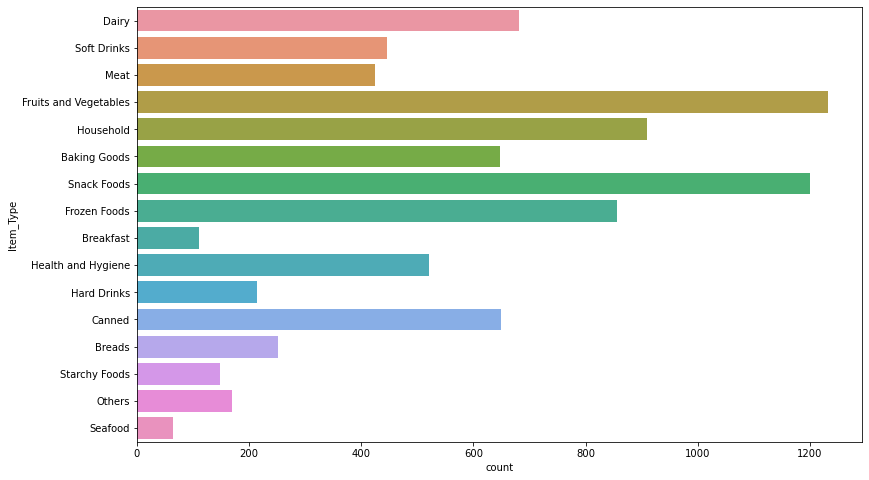

In [13]:
print(bm['Item_Type'].value_counts())
plt.figure(figsize=(13,8))
sns.countplot(y=bm['Item_Type'])
plt.show()

We have 16 type of items in Item type column-

A. Fruits and Vegetables type item is highest selling product, In numbers it is around 1232 .

B. The second highest selling product is snack and foods

C. Household and Frozen Food products holds very good position is selling category, In numbers it is around 910 and 856 respectively.

D. Dairy, canned, baking goods and health_&_hygiene items sale is also pretty much good.

E. Soft drinks and meat product is in demand but the sale od these product is not high.

F. Breads and hard drinks are not in high demand for selling but still exist.

G. Starchy, Breakfast, seafood and other products are lower selling product as compare to all the available products.

##### For training data

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


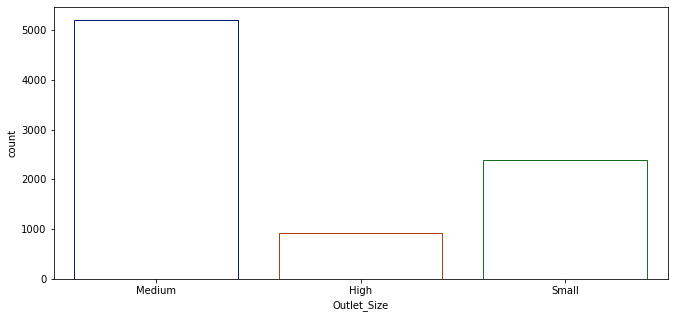

In [14]:
print(bm['Outlet_Size'].value_counts())
plt.figure(figsize=(11,5))
sns.countplot(bm['Outlet_Size'],facecolor=(0,0,0,0),edgecolor=sns.color_palette("dark",3))
plt.show()

Outlet Size -

We have 3 types of Outlet size

A. The number of medium size outlets are highest as compare to small and high size. The number of medium outlets is 5203.

B. Number of big outlets are 932, which is very less or we can say the presence of big outlets are very less in amount.

C. Small size outlets are also present in our data set, but the presentences of small size outlets is not much high.i.e.2383 in numbers

###### For training data

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Outlet_Location_Type'>

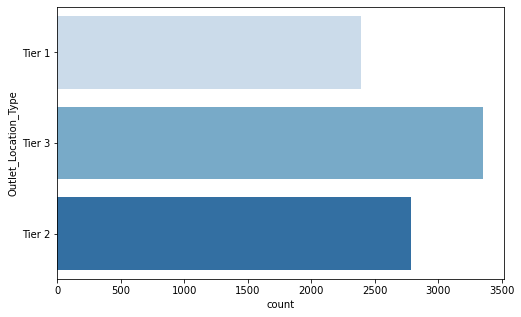

In [15]:
print(bm['Outlet_Location_Type'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(y=bm['Outlet_Location_Type'],palette='Blues')

Outlet location type -

We have three types of location for outlets

A. The sale of tier-3 outlet is highest,in numbers it is 3350. we can say tier -3 oulet is more contributing towards sale.

B. The sale of tier-2 location is also pretty much good.it is around 2785 in numbers.

c. The sale of tier-1 location is less as compare to tier3 and tier2.

###### For training data

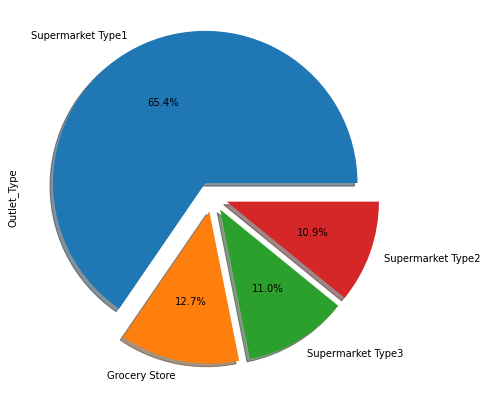

In [16]:
bm.Outlet_Type.value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1],autopct="%1.1f%%",shadow=True,figsize=(7,7))
plt.show()

Outlet Type -

A. Plenty of the outlets are supermarket type-1 and the presentences of this type of outlet is 65.4%.

B. Grocery stores are also present but the percentage of this type of outlets is very less i.e. 12.7%.

C. supermarket type-2 and supermarket type-3 are very less, out of 100 only 10.9% area is covered by supermarket type-2 similarly in the case of supermarket type-3

###### for training data only

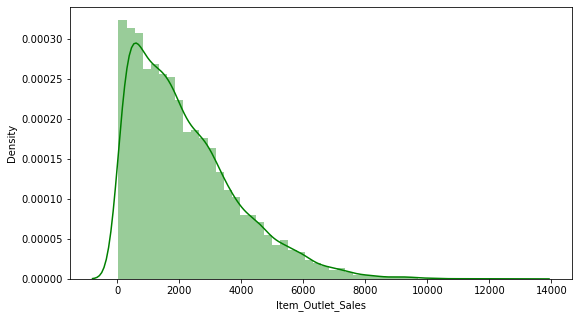

In [17]:
plt.figure(figsize=[9,5])
sns.distplot(bm['Item_Outlet_Sales'],color='g')
plt.show()

Item_outlet_sale-

This column represents the sale of particular item, The max sale is 13086 and the minimum sale is 3.29$.

###### For training data

<AxesSubplot:xlabel='Item_Type'>

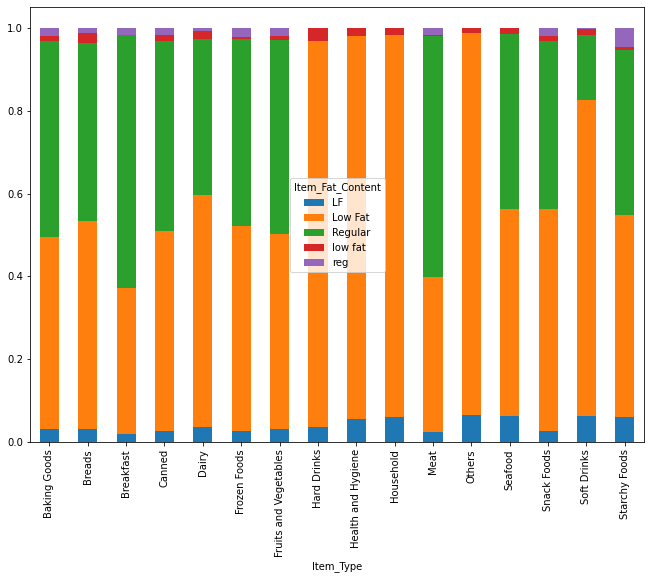

In [18]:
Item_Type=pd.crosstab(bm['Item_Type'],bm['Item_Fat_Content'])
Item_Type.div(Item_Type.sum(1).astype(float), axis=0).plot(stacked=True,figsize=(11,8),kind='bar')

Item_Type vs Item_Fat_Content

In this

1. Soft Drinks, Dairy and seafood type items content low fat.


2. Meat and Breakfast are the regular type items,high fat is present in these items.


3. Fruits & Vegetables, Frozen Foods, Canned and Breads item content Low Fat as well as regular fat.In this Regular fat and low fat are present in the similer ration

.

##### We have some column in which many values are giving same sound and these all values will create the problem in our prediction model, So we will convert the values in shorter form, So that machine can learn the data easily.  

###### For training data

In [19]:
bm['Item_Fat_Content']=bm['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
bm['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [20]:
bm['Item_Identifier']=bm['Item_Identifier'].apply(lambda x:x[0:2])
bm['Item_Identifier']=bm['Item_Identifier'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [21]:
bm['Item_Identifier'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Identifier, dtype: int64

We are Removing that columns which is not use full for prediction

###### For training data

In [22]:
bm=bm.drop(['Outlet_Identifier'],axis=1)

In [23]:
bm.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [24]:
bm

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Food,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Drinks,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Food,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,Food,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,Non-Consumable,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,Food,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,Food,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,Non-Consumable,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,Food,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### Adopting Encoding technique

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()

In [27]:
ko=["Item_Identifier","Item_Fat_Content","Item_Type",'Outlet_Size','Outlet_Location_Type','Outlet_Type']

for i in ko:
    bm[i]=le.fit_transform(bm[i])

In [28]:
bm.head(7)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,0,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,1,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,1,19.200,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,2,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
5,1,10.395,1,0.000000,0,51.4008,2009,1,2,2,556.6088
6,1,13.650,1,0.012741,13,57.6588,1987,0,2,1,343.5528


In [29]:
bm.shape

(8523, 11)

.

### Checking Outliers

In [30]:
bm.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,1.093864,12.736176,0.352693,0.066132,7.226681,140.992782,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,0.522090,4.234540,0.477836,0.051598,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,1.000000,9.310000,0.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,1.000000,12.150000,0.000000,0.053931,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1.000000,16.000000,1.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,2.000000,21.350000,1.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000,13086.964800


Item_Identifier                 AxesSubplot(0.125,0.657941;0.168478x0.222059)
Item_Weight                  AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Item_Fat_Content             AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Item_Visibility              AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Item_Type                       AxesSubplot(0.125,0.391471;0.168478x0.222059)
Item_MRP                     AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Outlet_Establishment_Year    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Outlet_Size                  AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Outlet_Location_Type               AxesSubplot(0.125,0.125;0.168478x0.222059)
Outlet_Type                     AxesSubplot(0.327174,0.125;0.168478x0.222059)
Item_Outlet_Sales               AxesSubplot(0.529348,0.125;0.168478x0.222059)
dtype: object

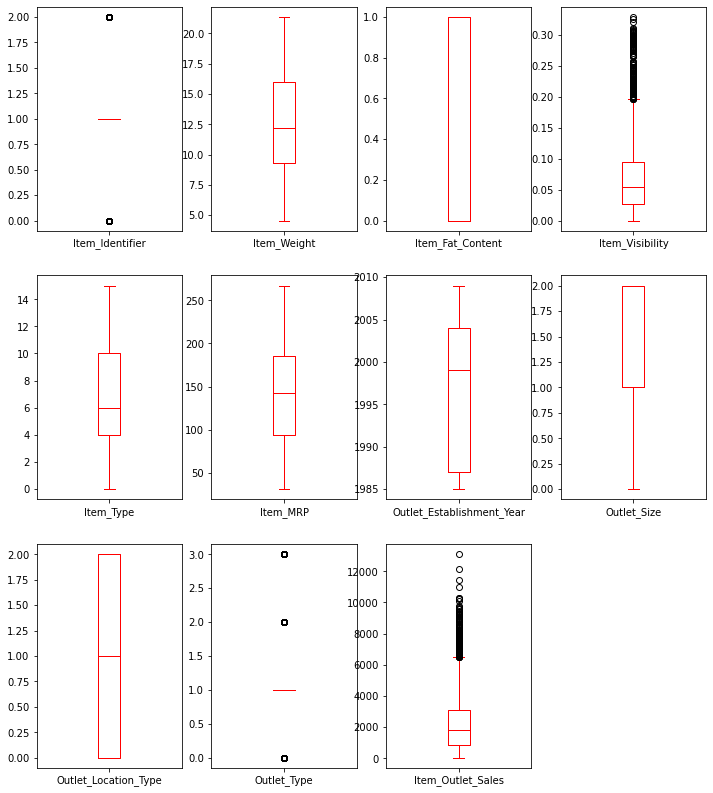

In [31]:
bm.plot(kind='box',subplots=True,figsize=[12,14],layout=(3,4),color='r')

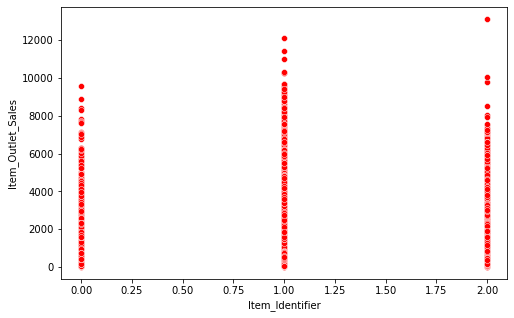

In [32]:
plt.figure(figsize=[8,5])
sns.scatterplot(y=bm['Item_Outlet_Sales'],x=bm['Item_Identifier'],color='r')
plt.show()

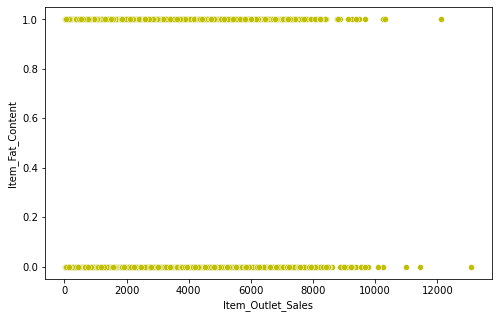

In [33]:
plt.figure(figsize=[8,5])
sns.scatterplot(x=bm['Item_Outlet_Sales'],y=bm['Item_Fat_Content'],color='y')
plt.show()

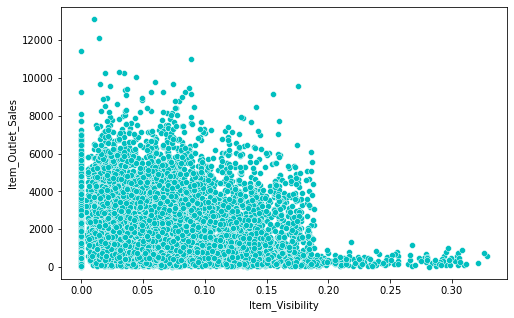

In [34]:
plt.figure(figsize=[8,5])
sns.scatterplot(y=bm['Item_Outlet_Sales'],x=bm['Item_Visibility'],color='c')
plt.show()

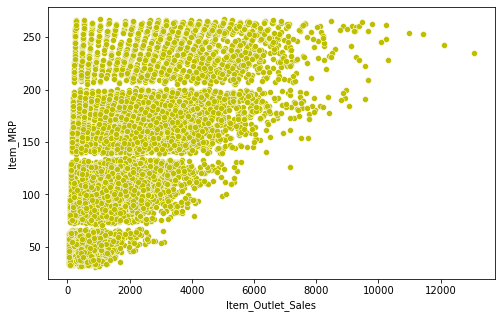

In [35]:
plt.figure(figsize=[8,5])
sns.scatterplot(x=bm['Item_Outlet_Sales'],y=bm['Item_MRP'],color='y')
plt.show()

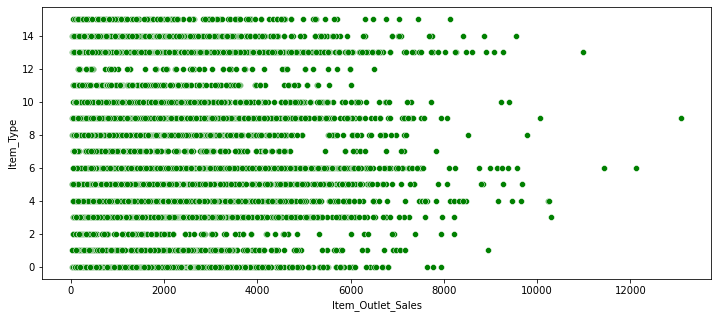

In [36]:
plt.figure(figsize=[12,5])
sns.scatterplot(x=bm['Item_Outlet_Sales'],y=bm['Item_Type'],color='g')
plt.show()

### Observation-3

From the above result we can conclude that--

1. In our data set only few columns has outliers.

2. In item visibility column outliers are also present as we can see the maximum values of this colum is 0.32 while mean is 0.06.It shows that chances of outliers may be present.
    

3. In item_MRP column, mean is 140.99 and std is 62.27, it means data are spreded but outliers are present very less as we can see in the scatter plot.

4. In Item_Type, Item_Weight, Outlet_Identifier, Outlet_Establishment_Year and in Outlet_Location_Type, outliers are not present.

##### Checking Skewness

In [37]:
from scipy.stats import skew

In [38]:
bm.skew()

Item_Identifier              0.114510
Item_Weight                  0.175321
Item_Fat_Content             0.616705
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

Item_Identifier
0.11448985378820523


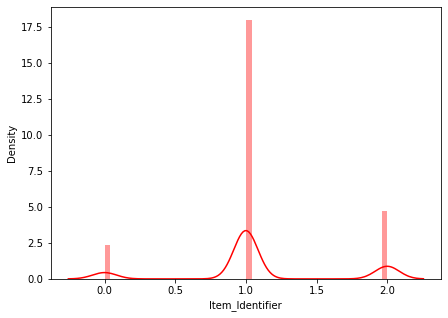

Item_Weight
0.1752903411767581


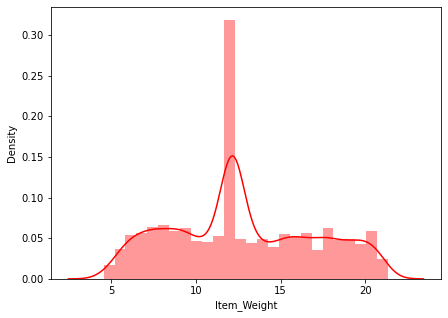

Item_Fat_Content
0.616596041992559


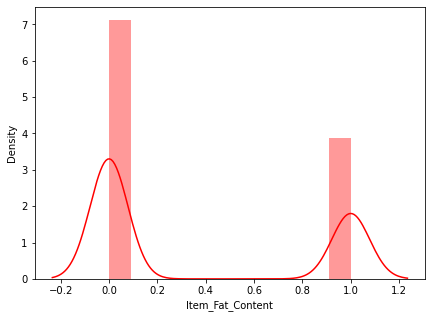

Item_Visibility
1.16688513828559


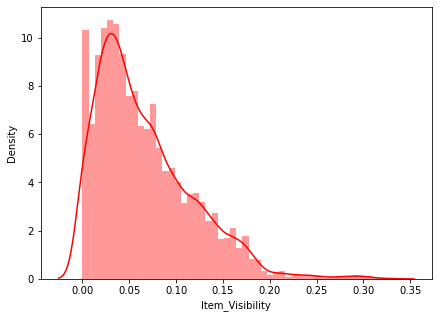

Item_Type
0.10163673290111704


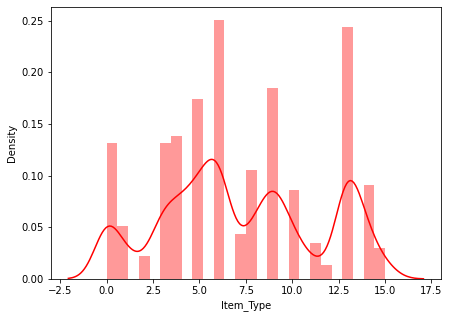

Item_MRP
0.1271798803336854


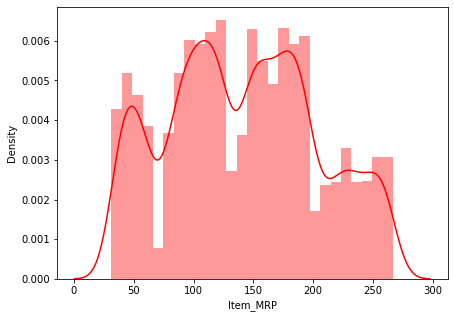

Outlet_Establishment_Year
-0.39657097595805835


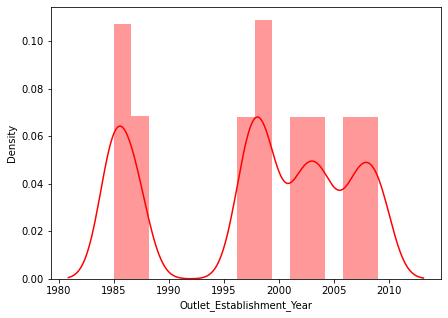

Outlet_Size
-0.0870567711287249


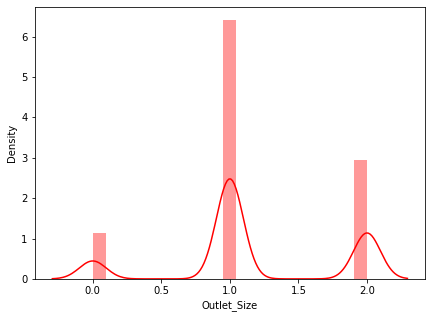

Outlet_Location_Type
-0.20905648093696858


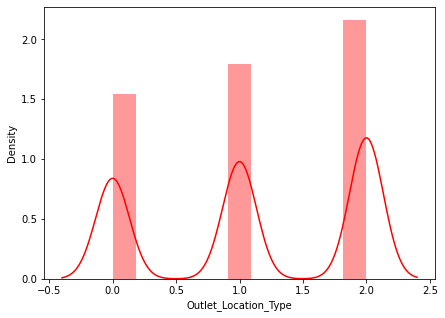

Outlet_Type
0.9272749842008103


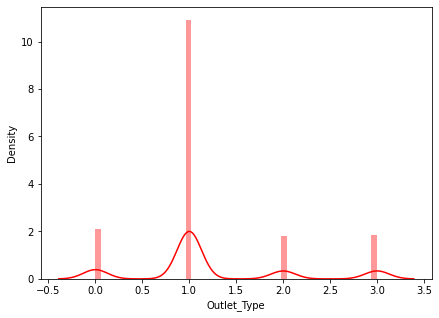

Item_Outlet_Sales
1.177323353967637


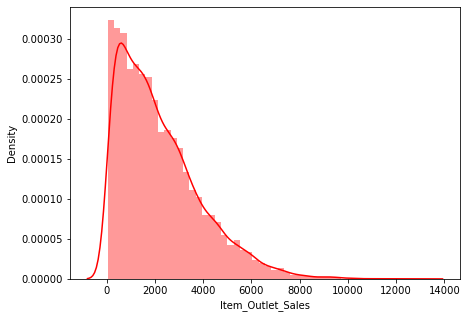

In [40]:
for i in bm:                                         
    print(i)
    print(skew(bm[i]))
    
    plt.figure(figsize=[7,5])
    sns.distplot(bm[i],color='r')
    plt.show()

### Observation-4

From the other observation we conclude that:
    
    1. In Item Visibility column high skewness(1.19) is present or we can say that the data is highly skewed in Item visibility column.
    
    2. Similerly in Outlet_type column skewness(0.92) is present .
    
    3. Item identifier column has no skewness(0.11),or we can say data are equally distributed.
    
    4. Item fat content data column has skewness(0.61) in data, we can say data are not normally distributed.
    
    5. Item weight(0.25), Item_type(0.09), Item_MRP(0.13) and Outlert_size(-0.08) these all are the columns where skewness is not present, it means data are normally distributed in this columns.

##### Checking Correlation

In [41]:
bm.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.128625
Outlet_Size                 -0.086182
Outlet_Establishment_Year   -0.049135
Item_Weight                  0.006443
Item_Identifier              0.011236
Item_Type                    0.017048
Item_Fat_Content             0.018719
Outlet_Location_Type         0.089367
Outlet_Type                  0.401522
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

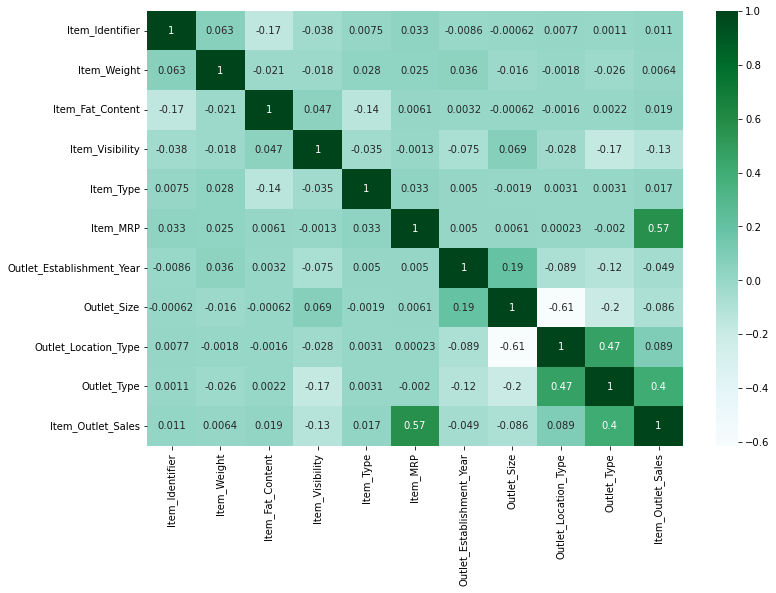

In [42]:
plt.figure(figsize=[12,8])
sns.heatmap(bm.corr(),annot=True,cmap='BuGn')
plt.show()

### Conclusion-5

We are considering a good bond when the correlation is in the range of -0.5 to +0.5.

From the above outcomes we can say that :

1. Item_MRP(0.57) and Outlet_Type(0.40) column has positive & good correlation with the target column which can be considered as a strong bond.


2. Item_Identifier columns has neither good nor bad correlation with the target column which can be considered as average bond.


3. Item_weight, Item_Fat_Content and Item_Type column has normal correlation with the target column which can be considered as a average bond.

Outlet_Type

    Supermarket Type-1 = 1
    
    Grocery Store      = 0
    
    Supermarket Type-3 = 3
    
    Supermarket Type-2 = 2  

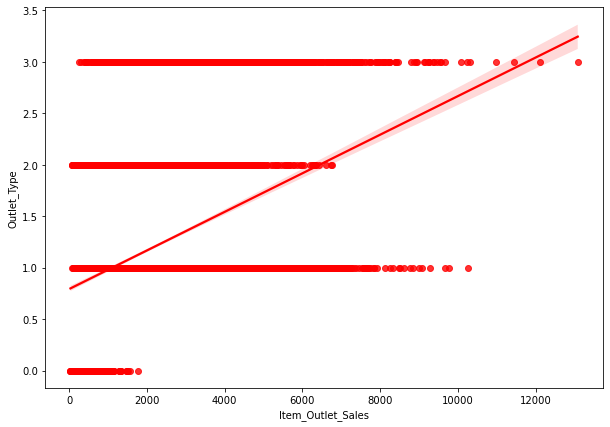

In [43]:
plt.figure(figsize=[10,7])
sns.regplot(data=bm,x='Item_Outlet_Sales',y='Outlet_Type',color='r')
plt.show()

Outlet_location_type

    Tier 3 = 2
    
    Tier 2 = 1 
    
    Tier 1 = 0 

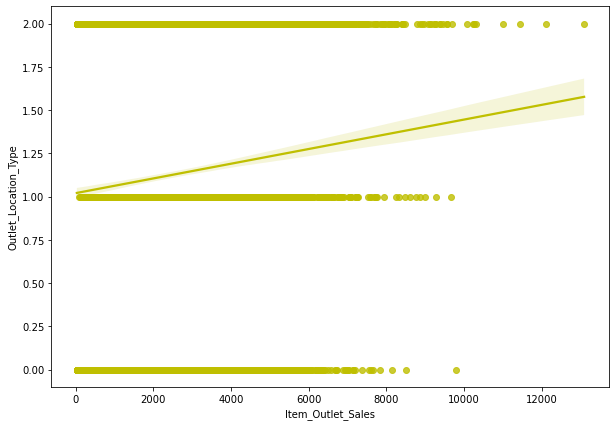

In [44]:
plt.figure(figsize=[10,7])
sns.regplot(data=bm,x='Item_Outlet_Sales',y='Outlet_Location_Type',color='y')
plt.show()

Outlet_Size

    Medium = 1
    
    Small  = 2
    
    High   = 0

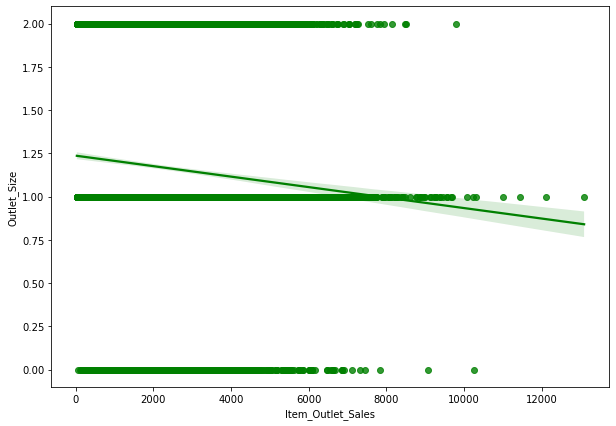

In [45]:
plt.figure(figsize=[10,7])
sns.regplot(data=bm,x='Item_Outlet_Sales',y='Outlet_Size',color='g')
plt.show()

Item_Fat_Content

Low Fat = 0          
Regular = 1

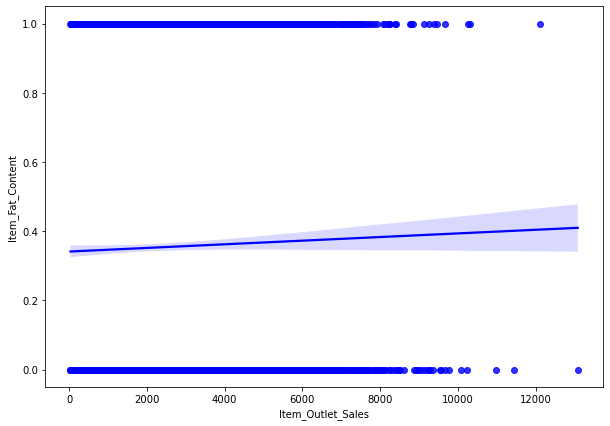

In [46]:
plt.figure(figsize=[10,7])
sns.regplot(data=bm,x='Item_Outlet_Sales',y='Item_Fat_Content',color='b')
plt.show()

Item type

Fruits and Vegetables = 6     
Snack Foods           = 13    
Household             = 9     
Frozen Foods          = 5     
Dairy                 = 4     
Canned                = 3     
Baking Goods          = 0     
Health and Hygiene    = 8     
Soft Drinks           = 14    
Meat                  = 10    
Breads                = 1     
Hard Drinks           = 7     
Others                = 11    
Starchy Foods         = 15    
Breakfast             = 2     
Seafood               = 12

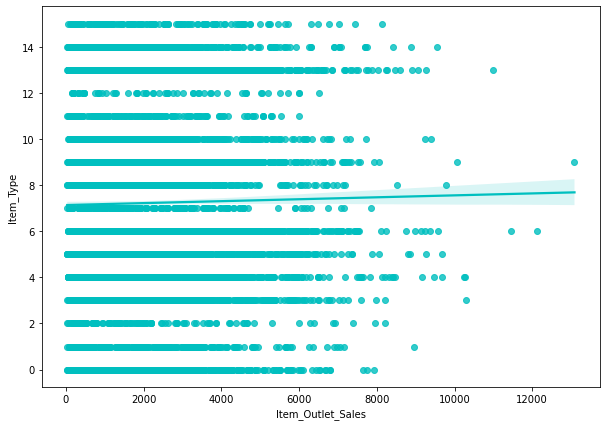

In [47]:
plt.figure(figsize=[10,7])
sns.regplot(data=bm,x='Item_Outlet_Sales',y='Item_Type',color='c')
plt.show()

Food             = 1

Non-Consumable   = 2

Drinks           = 0

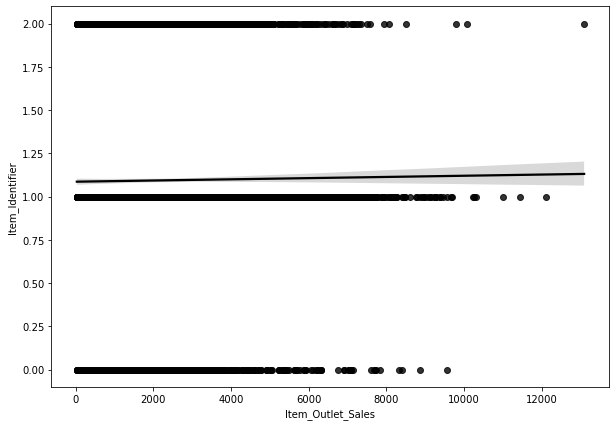

In [48]:
plt.figure(figsize=[10,7])
sns.regplot(data=bm,x='Item_Outlet_Sales',y='Item_Identifier',color='Black')
plt.show()

### Observation-6

From the above observation we can conclude that:
 
    1. Item outlets sales is higher in supermarket type-3 and supermarket type-1 ,which is arround 10,000 $ in both.
    
    2. Item sale is very less in Grocery store and in supermarket type-2 the sale is neither high nor low.
    
    3. In location tier-1 and tier-2 the sell of the item is below 8000.
    
    4. In location tier-3 the sell of the item is highest as compare to tier-1 and tier-2.which is arround 10,000 $.
    
    5. The sell is highest where the medium size outlets are present i.e. above 10,000$.
    
    6.The sell of the items is also pretty much good in High and small size outlets which is arround 8000$
    
    7.Those items are highly contributing towards sales which content low fat as compare to Regular.
    
    8.Regular fat contet items sales is also good but less then low fat.

    9.Snack Foods and Fruits & Vegetables items sell is highest as compare to other items.it means these item are high in demand.
    
    10.Baking Goods,Dairy, Hard Drinks and Breakfast items sell is also high and giving good contribution to make sale.
    
    11.Canned,Snack Foods and frozen foods items are being contributed to make a sale but not in higher amount.
    
    12.Breads and Seafood sale is compertively less.
    
    13.Meat, Starchy Foods and House holds sell is also pretty much good but not high.
    

## Data Preprocessing 

In [49]:
x=bm.drop(['Item_Outlet_Sales'],axis=1)

In [50]:
y=bm.Item_Outlet_Sales

In [51]:
x.shape

(8523, 10)

In [52]:
y.shape

(8523,)

#### VIF :
    Variance inflation factor 

#### Feature engineering

In [53]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [55]:
calc_vif(x)

,Variables,VIF Factors
0,Item_Identifier,5.575150
1,Item_Weight,10.122935
2,Item_Fat_Content,1.623574
3,Item_Visibility,2.766675
4,Item_Type,4.036989
5,Item_MRP,6.144449
6,Outlet_Establishment_Year,39.444061
7,Outlet_Size,7.944863
8,Outlet_Location_Type,5.828119
9,Outlet_Type,4.415721


From the above table we can say that the high Multicollinearity is present in between Item_Identifier and Item_Identifier,so we can think to drop Outlet_Establishment_Year

In [56]:
x=x.drop(['Outlet_Establishment_Year'],axis=1)

In [57]:
calc_vif(x)

,Variables,VIF Factors
0,Item_Identifier,4.985038
1,Item_Weight,7.920235
2,Item_Fat_Content,1.554995
3,Item_Visibility,2.639279
4,Item_Type,3.719289
5,Item_MRP,5.500609
6,Outlet_Size,5.668478
7,Outlet_Location_Type,4.900872
8,Outlet_Type,4.331991


From the above table we can say that the high Multicollinearity is present in between Item_weight and Outlet_size,so we can think to drop Item_weight

In [58]:
x=x.drop(['Item_Weight'],axis=1)

In [59]:
x.sample(3)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
3034,1,1,0.033555,5,74.7354,2,0,1
7867,1,1,0.099113,13,52.8666,2,1,1
3718,1,0,0.052766,13,189.7504,0,2,1


### Removing Outliers

In [60]:
import scipy
from scipy.stats import zscore

In [61]:
z=np.abs(zscore(x))
z.shape

(8523, 8)

In [62]:
threshold=3
print(np.where(z>3))

(array([  49,   83,  108,  174,  434,  502,  521,  532,  854, 1159, 1272,
       1291, 1311, 1324, 1434, 1496, 1501, 1560, 1575, 1644, 1651, 1805,
       1827, 1841, 2088, 2122, 2251, 2324, 2439, 2445, 2586, 2613, 2728,
       2855, 2895, 3017, 3206, 3399, 3458, 3474, 3488, 3497, 3540, 3750,
       3767, 3884, 3993, 4006, 4219, 4382, 4408, 4530, 4656, 4674, 4789,
       4941, 5031, 5150, 5287, 5374, 5732, 5734, 5795, 5837, 5880, 5891,
       5946, 6008, 6012, 6179, 6536, 6576, 6622, 6674, 6786, 6903, 7005,
       7088, 7107, 7121, 7215, 7250, 7278, 7388, 7499, 7558, 7603, 7744,
       7866, 7949, 8194, 8215, 8273, 8345, 8432], dtype=int64), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=int64))


In [63]:
x=x[(z<3).all(axis=1)]

In [64]:
y=y[(z<3).all(axis=1)]

In [65]:
x.shape

(8428, 8)

In [66]:
y.shape

(8428,)

In [67]:
percent_loss=(8523-8428)/8523*100
print(percent_loss,"%")

1.1146309984747156 %


In [68]:
xc=x.columns

### Removing Skewness

In [69]:
from sklearn.preprocessing import power_transform

In [70]:
x=power_transform(x,method='yeo-johnson')

In [71]:
x

array([[-0.17274168, -0.73671031, -1.14226961, ..., -0.28556618,
        -1.3800971 , -0.14516058],
       [-2.12322877,  1.35738564, -1.03291304, ..., -0.28556618,
         1.08970949,  1.03470397],
       [-0.17274168, -0.73671031, -1.11787359, ..., -0.28556618,
        -1.3800971 , -0.14516058],
       ...,
       [ 1.7156489 , -0.73671031, -0.53775357, ...,  1.39823948,
        -0.13724678, -0.14516058],
       [-0.17274168,  1.35738564,  1.53830862, ..., -0.28556618,
         1.08970949,  1.03470397],
       [-2.12322877, -0.73671031, -0.268203  , ...,  1.39823948,
        -1.3800971 , -0.14516058]])

### Adopting Scaling technique to scale the data

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
sc=StandardScaler()

In [74]:
x=sc.fit_transform(x)

In [75]:
x=pd.DataFrame(x,columns=xc)

In [76]:
x

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.172742,-0.736710,-1.142270,-0.713260,1.622782,-0.285566,-1.380097,-0.145161
1,-2.123229,1.357386,-1.032913,1.505750,-1.595589,-0.285566,1.089709,1.034704
2,-0.172742,-0.736710,-1.117874,0.684503,0.081596,-0.285566,-1.380097,-0.145161
3,-0.172742,1.357386,-1.734798,-0.216081,0.690021,-0.285566,1.089709,-1.974400
4,1.715649,-0.736710,-1.734798,0.468305,-1.476469,-1.921762,1.089709,-0.145161
...,...,...,...,...,...,...,...,...
8423,-0.172742,-0.736710,0.033409,1.306137,1.147914,-1.921762,1.089709,-0.145161
8424,-0.172742,1.357386,-0.212619,-1.924399,-0.462744,-0.285566,-0.137247,-0.145161
8425,1.715649,-0.736710,-0.537754,0.246688,-0.867711,1.398239,-0.137247,-0.145161
8426,-0.172742,1.357386,1.538309,1.306137,-0.548634,-0.285566,1.089709,1.034704


### Checking Skewness is removed or not-

In [77]:
x.skew()

Item_Identifier         0.048936
Item_Fat_Content        0.620786
Item_Visibility         0.115444
Item_Type              -0.164518
Item_MRP               -0.114976
Outlet_Size            -0.041756
Outlet_Location_Type   -0.221268
Outlet_Type             0.009297
dtype: float64

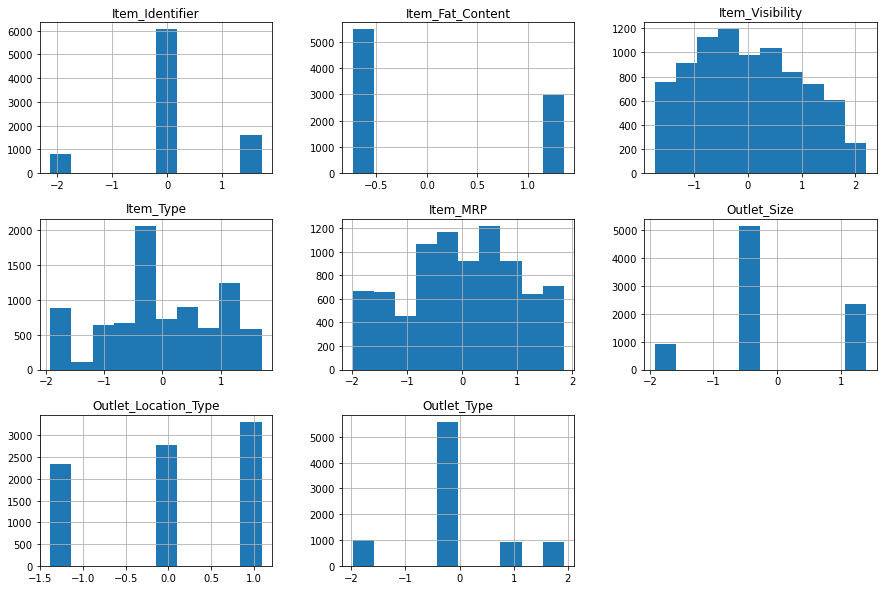

In [78]:
x.hist(figsize=(15,10))
plt.show()

###### we can continue with x and y i.e. Input data and output data.

###### This Machine Learning model is based on Regression modeling because we have output in the continious form.

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

###### Finding best random state

In [80]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("At random state ",i,'the training accuracy is',r2_score(y_train,pred_train))
    print("At random state ",i,'the testing accuracy is',r2_score(y_test,pred_test))
    print("\n")

At random state  0 the training accuracy is 0.5168016201534114
At random state  0 the testing accuracy is 0.518237990884179


At random state  1 the training accuracy is 0.5213463701500246
At random state  1 the testing accuracy is 0.49892393652804923


At random state  2 the training accuracy is 0.5128971784841405
At random state  2 the testing accuracy is 0.5346995934887604


At random state  3 the training accuracy is 0.5136831297342341
At random state  3 the testing accuracy is 0.530991590053156


At random state  4 the training accuracy is 0.5194937791976393
At random state  4 the testing accuracy is 0.5066795424743205


At random state  5 the training accuracy is 0.5133946360903865
At random state  5 the testing accuracy is 0.5305732540962591


At random state  6 the training accuracy is 0.5147273739090543
At random state  6 the testing accuracy is 0.525429450221853


At random state  7 the training accuracy is 0.5221292842206059
At random state  7 the testing accuracy is 0.49568

At random state  76 the training accuracy is 0.5167364409494366
At random state  76 the testing accuracy is 0.5180980298058131


At random state  77 the training accuracy is 0.521129291540253
At random state  77 the testing accuracy is 0.5008687806468657


At random state  78 the training accuracy is 0.5099516649643066
At random state  78 the testing accuracy is 0.543888214822988


At random state  79 the training accuracy is 0.5153336541864483
At random state  79 the testing accuracy is 0.5238156553683472


At random state  80 the training accuracy is 0.5166993584708004
At random state  80 the testing accuracy is 0.5179534454011014


At random state  81 the training accuracy is 0.5184859257929617
At random state  81 the testing accuracy is 0.5114870290496362


At random state  82 the training accuracy is 0.5121122095439474
At random state  82 the testing accuracy is 0.5351333496004451


At random state  83 the training accuracy is 0.5191029779770369
At random state  83 the testing acc

##### we found the best accuracy at 27

##### Linear Regression Model

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=27)
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print("r2 score : ",r2_score(y_test,pred_test))
print("Mean absoluate error :",mean_absolute_error(y_test,pred_test))
print("Root mean squred error: ",np.sqrt(mean_squared_error(y_test,pred_test)))

r2 score :  0.5482052191675679
Mean absoluate error : 881.4400003279732
Root mean squred error:  1177.5419138980812


In [82]:
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

Now we will use Diffrent Algorithium suh as :

1.K nearest neighbour 

2.Design tree

3.Support vector machine(svm)

###### K nearest neighbour

In [83]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print("r2 score :",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squred error :",mean_squared_error(y_test,pred))
print("Root mean squred error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score : 0.5046671891685262
Mean absolute error: 859.7000731198101
Mean squred error : 1520227.680767547
Root mean squred error: 1232.9751338804635


###### Design tree

In [84]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.1781735566020557
Mean absolute error: 1078.6816931198102
Mean squared error: 2522270.4426607573
Root mean squared error: 1588.1657478552916


###### Support vector machine(svm)

In [85]:
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.056285258953463035
Mean absolute error 1257.7641531989489
Mean squared error: 2896358.247859812
Root mean squared error: 1701.869045449682


### Boosting techniques

##### RandomForestRegressor

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.5645310715569993
Mean absolute error 802.8202341589562
Mean squared error: 1336499.227705041
Root mean squared error: 1156.0705980626965


###### AdaBoostRegressor

In [88]:
from sklearn.ensemble import AdaBoostRegressor

In [89]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
pred=ada.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.5535263824801323
Mean absolute error: 893.0560443405666
Mean squared error: 1370273.7578533886
Root mean squared error: 1170.586928789737


###### GradientBoostingRegressor

In [90]:
from sklearn.ensemble import GradientBoostingRegressor

In [91]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.6212301565734899
Mean absolute error: 752.8304950747001
Mean squared error: 1162483.8654447207
Root mean squared error: 1078.1854503955806


### Cross_Validation 

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
cvs=cross_val_score(knn,x,y,cv=5)
print("Cross validation of KNeighbors regressor model is",cvs.mean())

Cross validation of KNeighbors regressor model is 0.5033714632407497


In [94]:
cvs=cross_val_score(svr,x,y,cv=5)
print("Cross validation of SVM regressor model is",cvs.mean())

Cross validation of SVM regressor model is 0.06108086441836598


In [95]:
cvs=cross_val_score(dt,x,y,cv=5)
print("Cross validation of Decision Tree regressor model is",cvs.mean())

Cross validation of Decision Tree regressor model is 0.1747892525724191


In [96]:
cvs=cross_val_score(rfr,x,y,cv=5)
print("Cross validation of Random forest regressor Classifier model is",cvs.mean())

Cross validation of Random forest regressor Classifier model is 0.5392024078391996


In [97]:
cvs=cross_val_score(ada,x,y,cv=5)
print("Cross validation of adaboost regressor model is",cvs.mean())

Cross validation of adaboost regressor model is 0.4842948733932969


In [98]:
cvs=cross_val_score(gbr,x,y,cv=10)
print("Cross validation of Gradient boosting regressor model is",cvs.mean())

Cross validation of Gradient boosting regressor model is 0.5880190924661818


##### From the above crossvalidation result we can say that Gradient boosting regressor give the highest accuracy i.e. 58.80%

### Hyper Parameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
parameters ={"max_features":['auto','log2','sqrt'],
           'max_depth':[5,6,7,8,9],
           "criterion":['squared_error', 'absolute_error']}

In [101]:
GBC=GridSearchCV(gbr,parameters,cv=10)
GBC.fit(x_train,y_train)
GBC.best_params_

{'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'sqrt'}

In [102]:
GBC.best_estimator_

GradientBoostingRegressor(criterion='squared_error', max_depth=5,
                          max_features='sqrt')

In [124]:
GBC.pred=GBC.best_estimator_.predict(x_test)
r2_score(y_test,GBC.pred)

0.6139830907696102

In [293]:
GBR=GradientBoostingRegressor(criterion='squared_error', max_depth=5,
                          max_features='sqrt')
GBR.fit(x_train,y_train)
pred=GBR.predict(x_test)
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 0.6146705226046001
Mean absolute error: 762.0129456838478
Root mean squared error: 1087.4815222556742


### We will save Gradient boosting regressor because it is giving us a highest accuracy which is 61.46%

.

In [294]:
import joblib

In [295]:
joblib.dump(GBR,'mart_sale_prediction')

['mart_sale_prediction']

# Conclusion :

From the above process we can conclude that:
    
    1. In starting we have data set with null values , object type dtype for this we had adopted Imputation technique and Encoding technique(Label encoder) as well.
    
    2. We performed hole EDA process to get the insights from the data set, in oreder to doing this we got many relation between tha input data and output data.
    
    3. When we went under the preprocessing part we found some outliers and skewness.In oreder to remove these and clean the data we adopted Zscore method and power transform method.
    
    4. Then we had gone to Standardize our data in the single scale. For this we used standard scaler.
    
    5. Then we adopted VIF technique to find out the multicollinerity between the column. In order remove it we droped some column.
    
    6. Our model was based on linear regression that is why we used Regressor .
    
    7. Fristly we find best random state for our model i.e. 27.
    
    8. Then we used many regressor like-
        
        1.K nearest neighbour 

        2.Design tree

        3.Support vector machine(svm)
        
    9.To boost our model accuracy we used boosting technique as well like:
        
        1.Random forest regressor
        
        2.Adaboost regressor
        
        3.Gradient boosting regressor
        
    10.Gradient boosting gave us best accuracy.
    
    11. In order to remove under fitting and over fitting we apply cross-validation in our all the model and finally we found our best model and best accuracy.
    
    12. But we tried one more time to increase our model accuracy,for this we had gone for Hyper parameter tuning and took the help of Grid search cv for this.
    
    13.Finally we acchived 61.46% accuracy of Gradient boosting regressor , which gave us best accuracy as well as best model.
    
    14. With the help of joblib we saved our model with best parameters.
    
###### Now our model is ready for prediction

# Predictions from the trained model

In [226]:
test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [227]:
test.columns 

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [228]:
test.shape

(5681, 11)

In [229]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

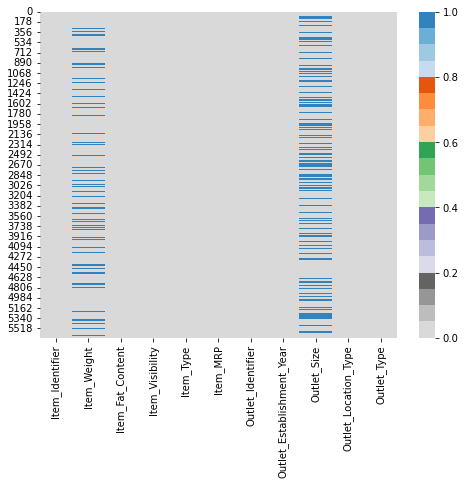

In [230]:
plt.figure(figsize=(8,6))    #Testing
sns.heatmap(test.isnull(),cmap='tab20c_r')
plt.show()

##### Observation-1 :

In the above dataset-
    
    1) The size of table is 5681*11 i.e. no. of rows are 5681 and no. of columns are 11.
    
    2) Out of 11 column, 7 columns are object type and rest 4 are int data types. So we will change object data type column into numeric data type using encoding technique.
    
    3) Huge amount of Null values are present in the item_weight and outlet_size columns, So there is need to adopt imputation technique.

#### Adopting imputation technique

In [231]:
from sklearn.impute import SimpleImputer

In [232]:
si=SimpleImputer(strategy='most_frequent')

In [233]:
test['Item_Weight']=si.fit_transform(test['Item_Weight'].values.reshape(-1,1))
test['Outlet_Size']=si.fit_transform(test['Outlet_Size'].values.reshape(-1,1))

## EDA

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64


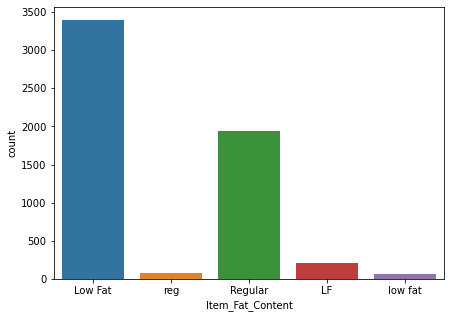

In [234]:
print(test['Item_Fat_Content'].value_counts())
plt.figure(figsize=(7,5))
sns.countplot(test['Item_Fat_Content'])
plt.show()

##### For testing data

We have 2 type of fat content item in Item fat content column-

A. Lower fat content items are higher as compare to regular item, which is around 3668  in numbers.

B. Regular fat content item are less, which is around 2013 in numbers.

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64


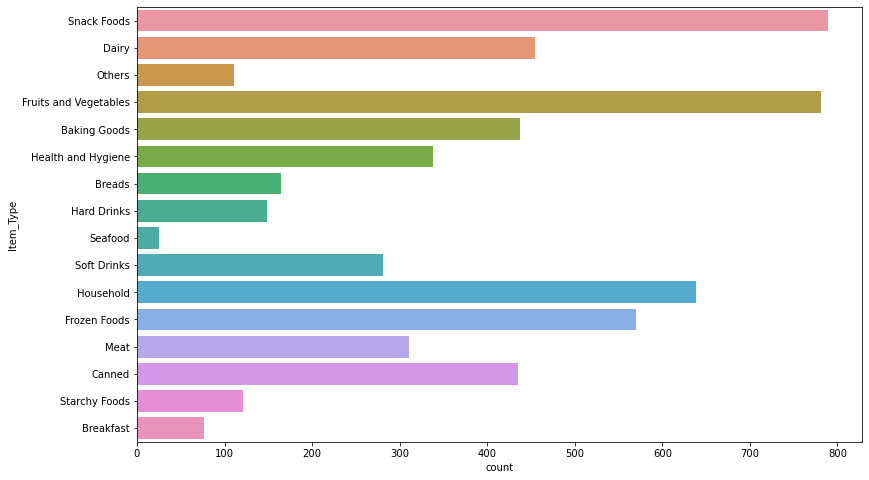

In [235]:
print(test['Item_Type'].value_counts())
plt.figure(figsize=(13,8))
sns.countplot(y=test['Item_Type'])
plt.show()

We have 16 type of items in Item type column-

A. Fruits & Vegetables and snack foods type item is highest selling product, In numbers it is around 789 and 781 resp.

B. The second highest selling product is household and frozen foods, in numbers it is around 638 and 570.

C. Dairy, baking goods and canned items sale is also pretty much good.

D. Health-Hygine and meat product is also in demand and sale is also good of this product,In numbers it is around 338 and 331.

E. Breads, hard drinks and starchy food not in high demand for selling.

F. Breakfast and seafood,other products are lower selling product as compare to all the available products

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64


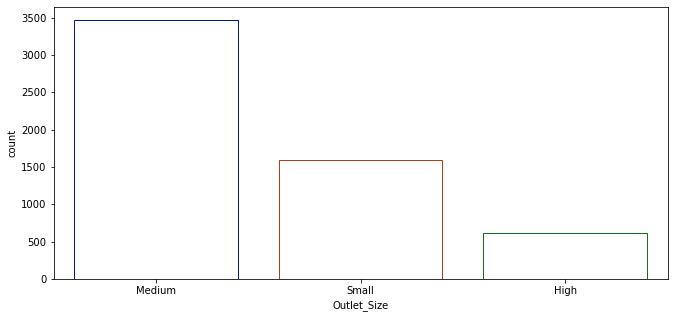

In [236]:
print(test['Outlet_Size'].value_counts())
plt.figure(figsize=(11,5))
sns.countplot(test['Outlet_Size'],facecolor=(0,0,0,0),edgecolor=sns.color_palette("dark",3))
plt.show()

We have 3 types of Outlet size

A. The number of medium size outlets are highest as compare to small and high size. The number of medium outlets is 3468.

B. Number of big outlets are 932, which is very less or we can say the presence of big outlets are very less in amount.

C. Small size outlets are also present in our data set, but the presentences of small size outlets is not much high.i.e.621 in numbers

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Outlet_Location_Type'>

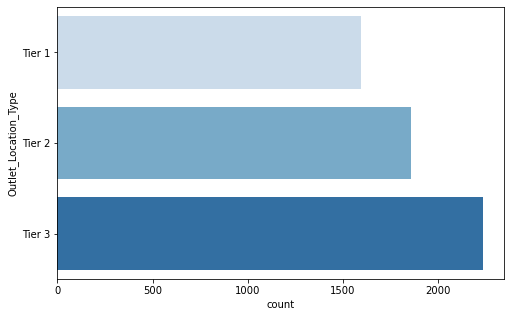

In [237]:
print(test['Outlet_Location_Type'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(y=test['Outlet_Location_Type'],palette='Blues')

We have three types of location for outlets

A. The sale of tier-3 outlet is highest,in numbers it is 2233. we can say tier -3 oulet is more contributing towards sale.

B. The sale of tier-2 location is also pretty much good.it is around 1856 in numbers.

c. The sale of tier-1 location is less as compare to tier3 and tier2.

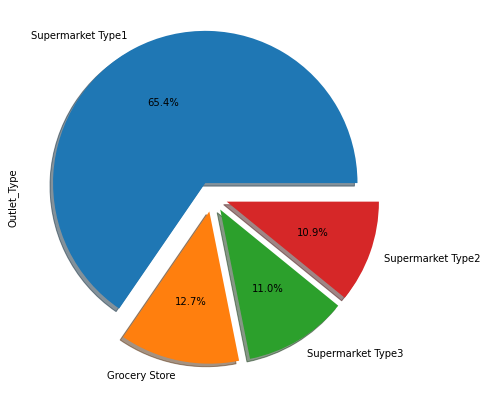

In [238]:
test.Outlet_Type.value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1],figsize=(7,7),shadow=True,autopct='%1.1f%%')
plt.show()


A. Plenty of the outlets are supermarket type-1 and the presentences of this type of outlet is 65.4%.

B. Grocery stores are also present but the percentage of this type of outlets is very less i.e. 12.7%.

C. supermarket type-2 and supermarket type-3 are very less, out of 100 only 10.9% area is covered by supermarket type-2 similarly in the case of supermarket type-3

<AxesSubplot:xlabel='Item_Type'>

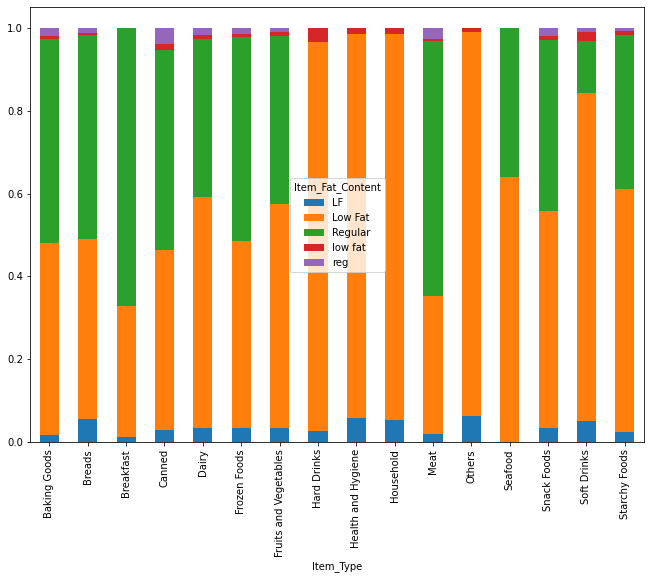

In [239]:
Item_Type=pd.crosstab(test['Item_Type'],test['Item_Fat_Content'])
Item_Type.div(Item_Type.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=[11,8])

In this

1.Soft Drinks, Dairy and seafood type items content low fat.

2.Meat and Breakfast are the regular type items,Low fat is less in this products.

3.Fruits & Vegetables, Frozen Foods, Canned and Breads item content Low Fat as well as regular fat.In this Regular fat and low fat are present in the similer ratio.

In [240]:
test['Item_Fat_Content']=test['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [241]:
test['Item_Identifier']=test['Item_Identifier'].apply(lambda x:x[0:2])
test['Item_Identifier']=test['Item_Identifier'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [242]:
test['Item_Identifier'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Identifier, dtype: int64

In [243]:
test=test.drop(['Outlet_Identifier'],axis=1)

In [244]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

### Adopting Encoding technique

In [245]:
from sklearn.preprocessing import LabelEncoder

In [246]:
le=LabelEncoder()

In [247]:
ko=["Item_Identifier","Item_Fat_Content","Item_Type",'Outlet_Size','Outlet_Location_Type','Outlet_Type']

for i in ko:
    test[i]=le.fit_transform(test[i])

In [248]:
test=test.drop(['Outlet_Establishment_Year'],axis=1)
test=test.drop(['Item_Weight'],axis=1)

In [249]:
test

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,0,0.007565,13,107.8622,1,0,1
1,1,1,0.038428,4,87.3198,1,1,1
2,2,0,0.099575,11,241.7538,1,2,0
3,1,0,0.015388,13,155.0340,1,1,1
4,1,1,0.118599,4,234.2300,1,2,3
...,...,...,...,...,...,...,...,...
5676,1,1,0.013496,13,141.3154,2,0,1
5677,1,1,0.142991,15,169.1448,1,2,2
5678,2,0,0.073529,8,118.7440,1,1,1
5679,1,1,0.000000,3,214.6218,1,1,1


###### Prediction based on our input data

Loading our model

In [296]:
model_ld=joblib.load("mart_sale_prediction")

In [297]:
model_ld

GradientBoostingRegressor(criterion='squared_error', max_depth=5,
                          max_features='sqrt')

In [299]:
pr=model_ld.predict(test)

In [302]:
prediction=pd.DataFrame(pr)

In [303]:
prediction

,0
0,2977.347889
1,3106.596958
2,3494.708767
3,3023.191062
4,3502.271187
...,...
5676,3034.430601
5677,3502.271187
5678,3023.191062
5679,3094.479684


.